# Step 1: Installation and setup

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Data preprocessing

In [2]:
# importing the dataset
from tensorflow.keras.datasets import cifar10


In [3]:
# Loading the dataset
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
class_names=['0 airplane','1 automobile','2 bird','3 cat','4 deer','5 dog','6 frog','7 horse','8 ship','9 truck']
print(class_names)

['0 airplane', '1 automobile', '2 bird', '3 cat', '4 deer', '5 dog', '6 frog', '7 horse', '8 ship', '9 truck']


In [5]:
np.max(x_train),np.min(x_train),np.mean(x_train)

(255, 0, 120.70756512369792)

In [6]:
np.max(y_train),np.min(y_train),np.mean(y_train)

(9, 0, 4.5)

In [7]:
# Normalizing the data
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
np.max(x_train),np.min(x_train),np.mean(x_train)

(1.0, 0.0, 0.4733630004850874)

In [9]:
# checking shape
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

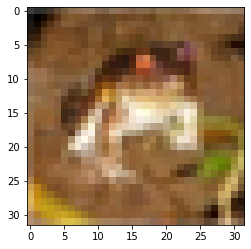

In [10]:
# seeing 1st image 
plt.imshow(x_train[0])

In [11]:
# checking class of the above image
y_train[0]

array([6], dtype=uint8)

In [12]:
class_names

['0 airplane',
 '1 automobile',
 '2 bird',
 '3 cat',
 '4 deer',
 '5 dog',
 '6 frog',
 '7 horse',
 '8 ship',
 '9 truck']

# Step 3: Building the model

In [13]:
# Define an object
model=tf.keras.models.Sequential()

In [14]:
# Adding first convolutional layer
  #1)Number of filters(kernel)=32
  #2)filters size=3
  #3)padding=same
  #4)activation=relu
  #5)input size=(32,32,3)
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))

In [15]:
# Adding second convolutional and maxpool layer
  #1)Number of filters(kernel)=32
  #2)filters size=3
  #3)padding=same
  #4)activation=relu
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
# adding maxpooling layer
 #1)pool size=2(pool size refers to size of the square unit on which we are going to select the maximum value is called as pool size)
 #2)strides=2(by how many pixel units filter movingis called as stride size)
 #3)padding=valid
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [16]:
# Adding third convolutional layer
  #1)Number of filters(kernel)=64
  #2)filters size=3
  #3)padding=same
  #4)activation=relu
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',))

In [17]:

# Adding fourth convolutional and maxpool layer
  #1)Number of filters(kernel)=64
  #2)filters size=3
  #3)padding=same
  #4)activation=relu
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
# adding maxpooling layer
 #1)pool size=2(pool size refers to size of the square unit on which we are going to select the maximum value is called as pool size)
 #2)strides=2(by how many pixel units filter movingis called as stride size)
 #3)padding=valid
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [18]:
# Adding the Dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [19]:
# Adding the flattening layer
model.add(tf.keras.layers.Flatten())

In [20]:
# Adding first dense layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [21]:
# Adding the second dense layer(output)
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [22]:
# summary of our created model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# Step 4: Compiling the model

In [23]:
# Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='sparse_categorical_accuracy')

# Step 5: Training the model

In [24]:
# Training the model
model.fit(x_train,y_train,batch_size=10,epochs=10,)

Epoch 1/10
5000/5000 [==============================] - 27s 4ms/step - loss: 1.4028 - sparse_categorical_accuracy: 0.4953
Epoch 2/10
5000/5000 [==============================] - 19s 4ms/step - loss: 1.0220 - sparse_categorical_accuracy: 0.6392
Epoch 3/10
5000/5000 [==============================] - 24s 5ms/step - loss: 0.8887 - sparse_categorical_accuracy: 0.6867
Epoch 4/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.8061 - sparse_categorical_accuracy: 0.7184
Epoch 5/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.7377 - sparse_categorical_accuracy: 0.7381
Epoch 6/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.6881 - sparse_categorical_accuracy: 0.7568
Epoch 7/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.6488 - sparse_categorical_accuracy: 0.7687
Epoch 8/10
5000/5000 [==============================] - 19s 4ms/step - loss: 0.6118 - sparse_categorical_accuracy: 0.7827
Epoch 9/10
5000/5000 [==

# Step 6: Model evaluation and prediction

In [25]:
# evaluating the model
loss_test,acc_test=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7811 - sparse_categorical_accuracy: 0.7441


In [26]:
print('Test Accuracy:{}'.format(acc_test))

Test Accuracy:0.7440999746322632


In [27]:
# predictions
y_pred=np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 1s 2ms/step


In [30]:
print(y_test[0]),print(y_pred[0]) # actual prediction

[3]
3


(None, None)

In [29]:
print(y_test[20]),print(y_pred[20]) # actual prediction

[7]
7


(None, None)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [32]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred)


In [33]:
print(cm)

[[811  15  32  11  13   5   8  10  69  26]
 [ 14 894   0   3   2   3   7   3  18  56]
 [102   6 595  39  99  48  47  37  18   9]
 [ 44  11  60 482  75 184  58  47  21  18]
 [ 27   3  63  54 710  31  35  69   7   1]
 [ 27   6  42 130  41 643  17  76   9   9]
 [ 15   4  54  49  36  19 801  13   6   3]
 [ 20   2  23  26  48  40   6 817   8  10]
 [ 57  30   8   1   5   4   5   7 864  19]
 [ 33  82   5   7   2   2   2  14  29 824]]


In [34]:
accuracy_score(y_test,y_pred)

0.7441

Pickling the model file for deployment

In [35]:
import pickle

In [37]:
pickle.dump(model,open('model.pkl','wb'))

In [38]:
pickled_model=pickle.load(open('model.pkl','rb'))

In [42]:
'''from google.colab import files
files.download('model.pkl')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>